In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
#read data
train_data = pd.read_csv("train.csv")

In [3]:
#data shape
print("train_data:",train_data.shape)

train_data: (891, 12)


In [4]:
#view first several rows of datasets
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
#view data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


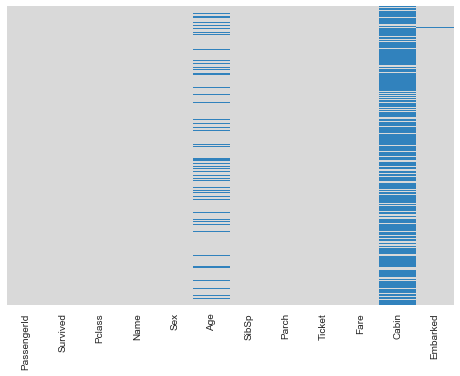

In [6]:
#view the missing values
sns.heatmap(train_data.isnull(),yticklabels= False,cbar = False,cmap = 'tab20c_r')


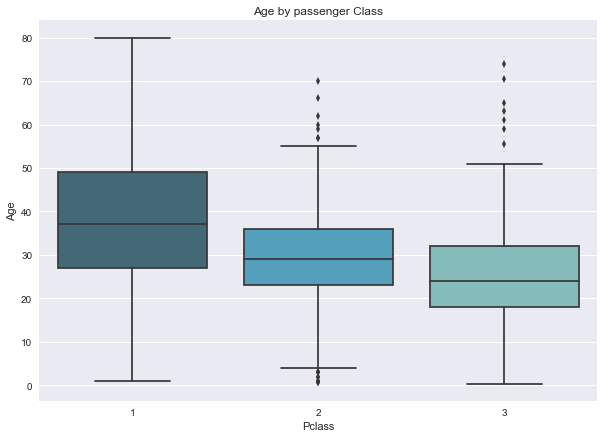

In [7]:
#view the average age of each class
plt.figure(figsize=(10,7))
sns.boxplot(x = "Pclass", y = "Age",data = train_data,palette = "GnBu_d" ).set_title("Age by passenger Class")
plt.show()

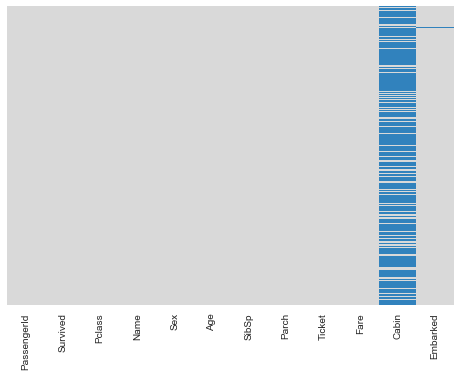

In [8]:
#missing values functions
def filling(cols):
    Age = cols[0]
    Pclass = cols[1]
    if(pd.isnull(Age)):
        if(Pclass == 1):
            return 37
        elif(Pclass ==2):
            return 29
        else:
            return 24
    else:
        return Age

#apply the function to the Age column
train_data["Age"] = train_data[["Age","Pclass"]].apply(filling,axis=1)

#view the result after the filling
sns.heatmap(train_data.isnull(),yticklabels= False,cbar = False,cmap = 'tab20c_r')

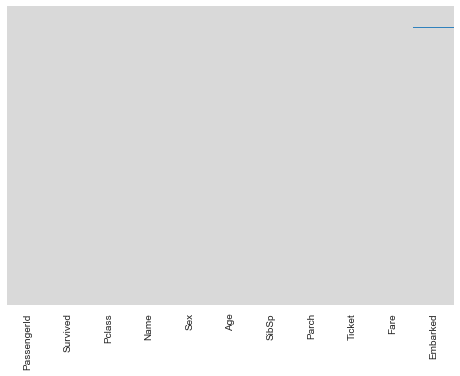

In [9]:
#remove the Cabin
train_data.drop("Cabin",axis = 1,inplace = True)
sns.heatmap(train_data.isnull(),yticklabels= False,cbar = False,cmap = 'tab20c_r')

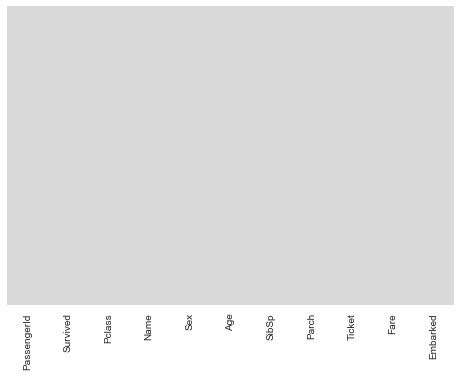

In [10]:
#remove the missing value of Embarked
train_data.dropna(inplace = True)
sns.heatmap(train_data.isnull(),yticklabels= False,cbar = False,cmap = 'tab20c_r')

In [11]:
#view datatype
print(train_data.info())

#view the objects
print("the non-null objects are:")
print(train_data.select_dtypes(["object"]).columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None
the non-null objects are:
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [12]:
# Remove unnecessary columns  
train_data.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    train_data[colname] = train_data[colname].astype('category')

In [13]:
#numeric summary
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.019314,13.209814,0.42,22.0000,26.0000,36.5,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


In [14]:
# Remove PassengerId
train_data.drop('PassengerId', inplace = True, axis = 1)
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.019314,13.209814,0.42,22.0000,26.0000,36.5,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


Passenger Class Summary


Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


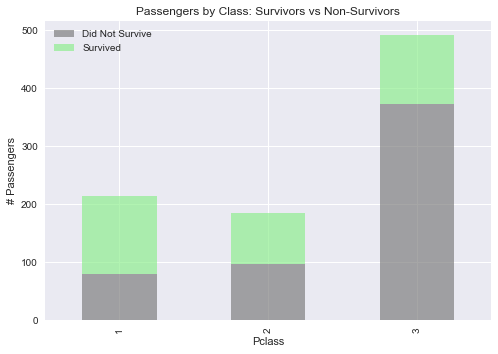

In [15]:
#view the target
print('Passenger Class Summary')

print('\n')
print(train_data.groupby(['Pclass','Survived']).Pclass.count().unstack())

#passenger visulazition
pclass = train_data.groupby(['Pclass','Survived']).Pclass.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = 'Passengers by Class: Survivors vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Pclass')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])
plt.show()

Passenger Class Summary


Survived      0      1
SibSp                 
0         398.0  208.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


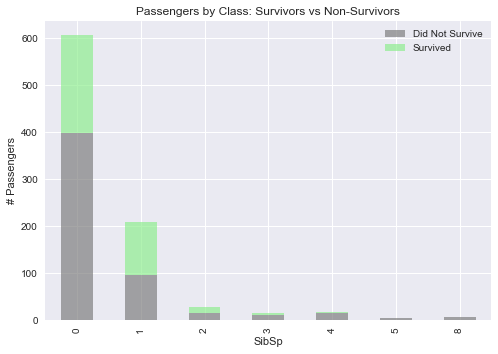

In [16]:
#view the solo passenger
#view the target
print('Passenger Class Summary')

print('\n')
print(train_data.groupby(['SibSp','Survived']).SibSp.count().unstack())

#passenger visulazition
pclass = train_data.groupby(['SibSp','Survived']).SibSp.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = 'Passengers by Class: Survivors vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('SibSp')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])
plt.show()

Statistical Summary of Age and Fare


Did Not Survive
      count       mean        std  min      25%   50%   75%    max
Age   549.0  29.560109  12.778433  1.0  23.0000  25.0  37.0   74.0
Fare  549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0
--------------------------------------------------------------------------------
Survived
      count       mean        std   min       25%   50%      75%       max
Age   340.0  28.146088  13.852728  0.42  21.00000  27.0  36.0000   80.0000
Fare  340.0  48.209498  66.748773  0.00  12.44375  26.0  56.9469  512.3292


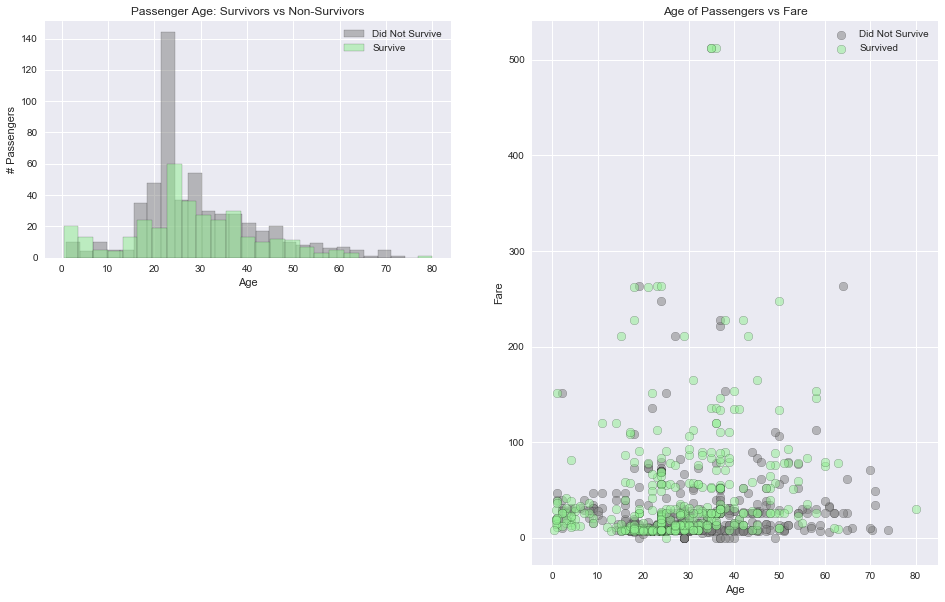

In [17]:
#ticket fare and age of passegers
print('Statistical Summary of Age and Fare')
print('\n')
print('Did Not Survive')
print(train_data[train_data['Survived']==0][['Age','Fare']].describe().transpose())
print('--'*40)
print('Survived')
print(train_data[train_data['Survived']==1][['Age','Fare']].describe().transpose())

#subplot numeric features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(train_data[train_data['Survived'] ==0].Age, bins = 25, label ='Did Not Survive', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(train_data[train_data['Survived']==1].Age, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')

ax3 = fig.add_subplot(122)
ax3.scatter(x = train_data[train_data['Survived']==0].Age, y = train_data[train_data['Survived']==0].Fare,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Survive')
ax3.scatter(x = train_data[train_data['Survived']==1].Age, y = train_data[train_data['Survived']==1].Fare,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Survived')
ax3.set_xlabel('Age')
ax3.set_ylabel('Fare')
ax3.set_title('Age of Passengers vs Fare')
ax3.legend(loc = "upper right")

plt.show()

In [21]:
#categorical features
train_data.select_dtypes(["category"]).columns

Index(['Sex', 'Embarked'], dtype='object')

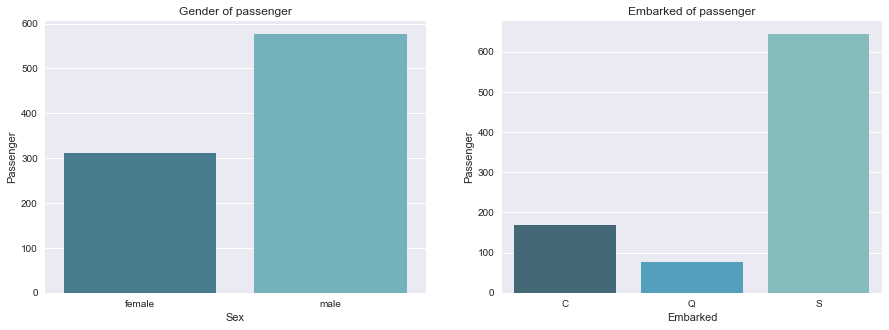

In [25]:
sns.set_style("darkgrid")
f,axes = plt.subplots(1,2,figsize = (15,5))

#plot[0]
sns.countplot(x = "Sex", data = train_data, palette = "GnBu_d", ax = axes[0])
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Passenger")
axes[0].set_title("Gender of passenger")

#plot[1]
sns.countplot(x = "Embarked", data = train_data, palette = "GnBu_d", ax = axes[1])
axes[1].set_xlabel("Embarked")
axes[1].set_ylabel("Passenger")
axes[1].set_title("Embarked of passenger")

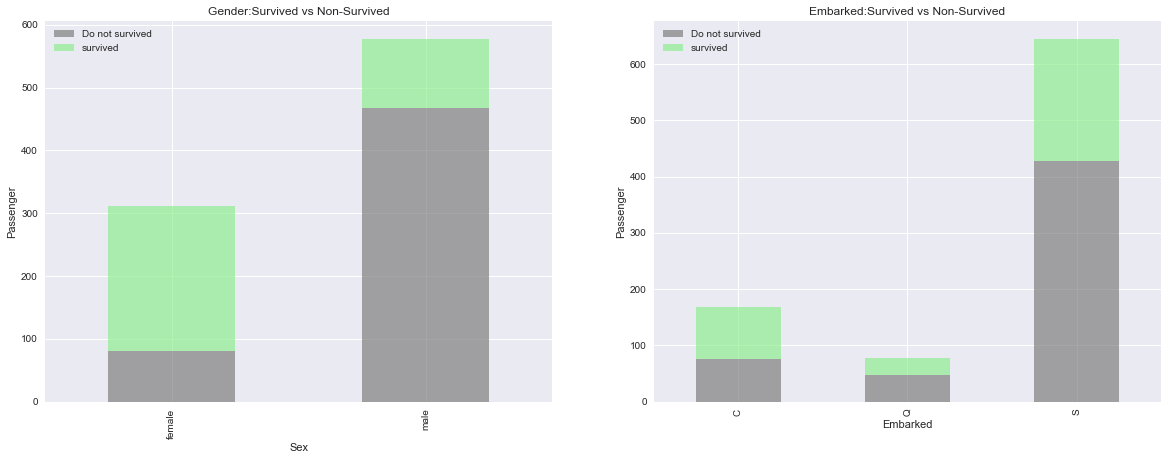

In [31]:
#target vs category
sns.set_style("darkgrid")
f,axes = plt.subplots(1,2,figsize = (20,7))

#Sex
gender = train_data.groupby(["Sex","Survived"]).Sex.count().unstack()
gender.plot(kind = "bar" ,stacked = True,
           title = "Gender:Survived vs Non-Survived",
           color = ["grey","lightgreen"],alpha = .7, ax = axes[0])
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Passenger")
axes[0].legend(["Do not survived","survived"])

#Embarked
embark = train_data.groupby(["Embarked","Survived"]).Embarked.count().unstack()
embark.plot(kind = "bar" ,stacked = True,
           title = "Embarked:Survived vs Non-Survived",
           color=["grey","lightgreen"],alpha = .7,ax = axes[1])
axes[1].set_xlabel("Embarked")
axes[1].set_ylabel("Passenger")
axes[1].legend(["Do not survived","survived"])


plt.show()

In [32]:
#prepare for the train
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:

print("shape of train_data",train_data.shape)
train_data.head()

shape of train_data (889, 6)


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [41]:
#Machine learning
#grab the train set without Survived attribute
x = train_data.drop("Survived", axis = 1)

#grab the target set
y = train_data["Survived"]

from sklearn.model_selection import train_test_split
#divide the portion into five and train sets takes 4 of them
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)
print(x_train.shape)
print(x_test.shape)

#Logical regression
# Fit 
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train)

# Predict
y_pred_lreg = lreg.predict(x_test)

print(y_pred_lreg)

(711, 5)
(178, 5)
[0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0]


In [44]:
# Score It
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[95 12]
 [34 37]]
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Accuracy 74.16 %
